In [1]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

9913344it [00:01, 9870787.84it/s]                              


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



29696it [00:00, 29769132.79it/s]         


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



1649664it [00:00, 5301510.58it/s]                            


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



5120it [00:00, ?it/s]                   

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



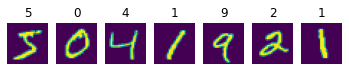

In [3]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

In [4]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [5]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


In [6]:
# Create a dataloader to load the data in batches
batch_size = 100
train_loader = torch.utils.data.DataLoader(data_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=batch_size,shuffle=True)


In [7]:
# Define the model
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = torch.nn.Dropout2d()
        self.fc1 = torch.nn.Linear(320,50)
        self.fc2 = torch.nn.Linear(50,10)

    def forward(self,x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x,2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x,2)
        x = x.view(-1,320)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [8]:
# Create the model
model = CNN()

In [9]:
# fit the model
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


In [10]:
# Define the loss function 
loss_fn = torch.nn.CrossEntropyLoss()


In [11]:
# matrices to store the loss and accuracy
loss_mat = np.zeros(len(train_loader))
acc_mat = np.zeros(len(train_loader))
print('Training the model...')
for i,(data,target) in enumerate(train_loader):
    data,target = data.to(torch.float),target.to(torch.long)
    output = model(data)
    loss = loss_fn(output,target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_mat[i] = loss.item()
    acc_mat[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
    if i%100==0:
        print('Iteration:',i,'Loss:',loss.item())

Training the model...
Iteration: 0 Loss: 2.3124539852142334
Iteration: 100 Loss: 2.3100311756134033
Iteration: 200 Loss: 2.291125535964966
Iteration: 300 Loss: 2.2901456356048584
Iteration: 400 Loss: 2.295431137084961
Iteration: 500 Loss: 2.2362284660339355


In [12]:
# accuracy on test set
acc_test = np.zeros(len(test_loader))
for i,(data,target) in enumerate(test_loader):
    data,target = data.to(torch.float),target.to(torch.long)
    output = model(data)
    acc_test[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
    print('Test accuracy:',acc_test[i])

Test accuracy: 0.46
Test accuracy: 0.47
Test accuracy: 0.42
Test accuracy: 0.41
Test accuracy: 0.44
Test accuracy: 0.43
Test accuracy: 0.44
Test accuracy: 0.35
Test accuracy: 0.37
Test accuracy: 0.4
Test accuracy: 0.5
Test accuracy: 0.44
Test accuracy: 0.46
Test accuracy: 0.39
Test accuracy: 0.42
Test accuracy: 0.43
Test accuracy: 0.39
Test accuracy: 0.45
Test accuracy: 0.44
Test accuracy: 0.41
Test accuracy: 0.5
Test accuracy: 0.46
Test accuracy: 0.41
Test accuracy: 0.43
Test accuracy: 0.51
Test accuracy: 0.47
Test accuracy: 0.38
Test accuracy: 0.52
Test accuracy: 0.41
Test accuracy: 0.45
Test accuracy: 0.48
Test accuracy: 0.45
Test accuracy: 0.41
Test accuracy: 0.32
Test accuracy: 0.36
Test accuracy: 0.48
Test accuracy: 0.38
Test accuracy: 0.5
Test accuracy: 0.45
Test accuracy: 0.53
Test accuracy: 0.3
Test accuracy: 0.4
Test accuracy: 0.41
Test accuracy: 0.44
Test accuracy: 0.48
Test accuracy: 0.45
Test accuracy: 0.37
Test accuracy: 0.52
Test accuracy: 0.44
Test accuracy: 0.4
Test ac

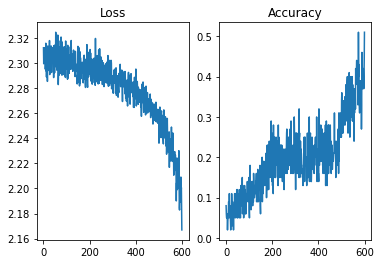

In [13]:
# Plot the loss and accuracy
fig,ax = plt.subplots(1,2)
ax[0].plot(loss_mat)
ax[0].set_title('Loss')
ax[1].plot(acc_mat)
ax[1].set_title('Accuracy')
plt.show()

Training the model with learning rate: 0.001
Iteration: 0 Loss: 2.310633897781372
Iteration: 100 Loss: 2.2958571910858154
Iteration: 200 Loss: 2.296879291534424
Iteration: 300 Loss: 2.3020763397216797
Iteration: 400 Loss: 2.3131771087646484
Iteration: 500 Loss: 2.3080832958221436
Test accuracy: 0.11
Test accuracy: 0.11
Test accuracy: 0.11
Test accuracy: 0.08
Test accuracy: 0.17
Test accuracy: 0.14
Test accuracy: 0.12
Test accuracy: 0.12
Test accuracy: 0.1
Test accuracy: 0.13
Test accuracy: 0.14
Test accuracy: 0.14
Test accuracy: 0.08
Test accuracy: 0.12
Test accuracy: 0.1
Test accuracy: 0.1
Test accuracy: 0.18
Test accuracy: 0.13
Test accuracy: 0.09
Test accuracy: 0.11
Test accuracy: 0.17
Test accuracy: 0.11
Test accuracy: 0.09
Test accuracy: 0.12
Test accuracy: 0.07
Test accuracy: 0.07
Test accuracy: 0.09
Test accuracy: 0.13
Test accuracy: 0.11
Test accuracy: 0.16
Test accuracy: 0.07
Test accuracy: 0.1
Test accuracy: 0.15
Test accuracy: 0.19
Test accuracy: 0.13
Test accuracy: 0.05
Tes

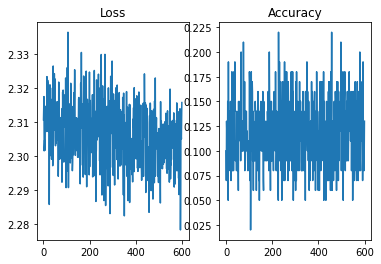

Training the model with learning rate: 0.01
Iteration: 0 Loss: 2.307440996170044
Iteration: 100 Loss: 2.2854344844818115
Iteration: 200 Loss: 2.269477128982544
Iteration: 300 Loss: 2.184770107269287
Iteration: 400 Loss: 1.965888261795044
Iteration: 500 Loss: 1.1478655338287354
Test accuracy: 0.82
Test accuracy: 0.79
Test accuracy: 0.77
Test accuracy: 0.83
Test accuracy: 0.76
Test accuracy: 0.71
Test accuracy: 0.74
Test accuracy: 0.84
Test accuracy: 0.83
Test accuracy: 0.74
Test accuracy: 0.78
Test accuracy: 0.79
Test accuracy: 0.71
Test accuracy: 0.79
Test accuracy: 0.87
Test accuracy: 0.82
Test accuracy: 0.81
Test accuracy: 0.74
Test accuracy: 0.83
Test accuracy: 0.85
Test accuracy: 0.79
Test accuracy: 0.8
Test accuracy: 0.75
Test accuracy: 0.79
Test accuracy: 0.79
Test accuracy: 0.82
Test accuracy: 0.8
Test accuracy: 0.76
Test accuracy: 0.7
Test accuracy: 0.74
Test accuracy: 0.78
Test accuracy: 0.8
Test accuracy: 0.84
Test accuracy: 0.83
Test accuracy: 0.83
Test accuracy: 0.8
Test ac

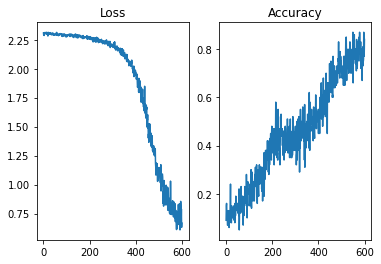

Training the model with learning rate: 0.1
Iteration: 0 Loss: 2.2953484058380127
Iteration: 100 Loss: 0.3567591905593872
Iteration: 200 Loss: 0.26752689480781555
Iteration: 300 Loss: 0.14241954684257507
Iteration: 400 Loss: 0.13369759917259216
Iteration: 500 Loss: 0.10178961604833603
Test accuracy: 0.96
Test accuracy: 1.0
Test accuracy: 0.96
Test accuracy: 0.98
Test accuracy: 0.97
Test accuracy: 0.95
Test accuracy: 0.98
Test accuracy: 0.97
Test accuracy: 0.96
Test accuracy: 0.97
Test accuracy: 1.0
Test accuracy: 0.99
Test accuracy: 0.95
Test accuracy: 0.92
Test accuracy: 1.0
Test accuracy: 0.96
Test accuracy: 0.96
Test accuracy: 1.0
Test accuracy: 0.99
Test accuracy: 0.95
Test accuracy: 0.97
Test accuracy: 0.98
Test accuracy: 0.99
Test accuracy: 0.97
Test accuracy: 1.0
Test accuracy: 0.94
Test accuracy: 0.98
Test accuracy: 0.99
Test accuracy: 0.94
Test accuracy: 0.96
Test accuracy: 0.96
Test accuracy: 0.98
Test accuracy: 0.98
Test accuracy: 0.95
Test accuracy: 0.96
Test accuracy: 0.94


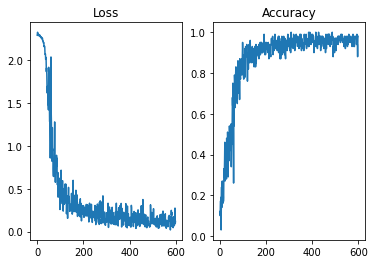

Training the model with learning rate: 1
Iteration: 0 Loss: 2.3120975494384766
Iteration: 100 Loss: 2.2895009517669678
Iteration: 200 Loss: 2.300424098968506
Iteration: 300 Loss: 2.3249120712280273
Iteration: 400 Loss: 2.3170690536499023
Iteration: 500 Loss: 2.3137199878692627
Test accuracy: 0.17
Test accuracy: 0.09
Test accuracy: 0.13
Test accuracy: 0.12
Test accuracy: 0.09
Test accuracy: 0.1
Test accuracy: 0.12
Test accuracy: 0.14
Test accuracy: 0.12
Test accuracy: 0.08
Test accuracy: 0.09
Test accuracy: 0.1
Test accuracy: 0.11
Test accuracy: 0.14
Test accuracy: 0.12
Test accuracy: 0.11
Test accuracy: 0.15
Test accuracy: 0.08
Test accuracy: 0.12
Test accuracy: 0.11
Test accuracy: 0.08
Test accuracy: 0.09
Test accuracy: 0.06
Test accuracy: 0.13
Test accuracy: 0.1
Test accuracy: 0.13
Test accuracy: 0.1
Test accuracy: 0.14
Test accuracy: 0.12
Test accuracy: 0.12
Test accuracy: 0.14
Test accuracy: 0.12
Test accuracy: 0.18
Test accuracy: 0.09
Test accuracy: 0.12
Test accuracy: 0.11
Test a

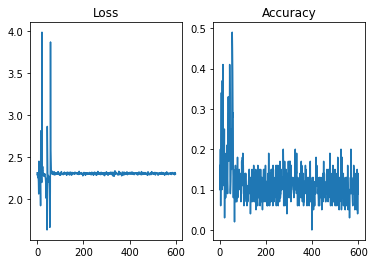

In [14]:
# grid search
learning_rates = [0.001,0.01,0.1,1]
for lr in learning_rates:
    model = CNN()
    optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    loss_fn = torch.nn.CrossEntropyLoss()
    loss_mat = np.zeros(len(train_loader))
    acc_mat = np.zeros(len(train_loader))
    print('Training the model with learning rate:',lr)
    for i,(data,target) in enumerate(train_loader):
        data,target = data.to(torch.float),target.to(torch.long)
        output = model(data)
        loss = loss_fn(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_mat[i] = loss.item()
        acc_mat[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
        if i%100==0:
            print('Iteration:',i,'Loss:',loss.item())
    acc_test = np.zeros(len(test_loader))
    for i,(data,target) in enumerate(test_loader):
        data,target = data.to(torch.float),target.to(torch.long)
        output = model(data)
        acc_test[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
        print('Test accuracy:',acc_test[i])
    fig,ax = plt.subplots(1,2)
    ax[0].plot(loss_mat)
    ax[0].set_title('Loss')
    ax[1].plot(acc_mat)
    ax[1].set_title('Accuracy')
    plt.show() 

In [15]:
# faire un test avec le model
test_data = data_test[0][0].view(1,1,28,28)
test_data = test_data.to(torch.float)
output = model(test_data)
print('Predicted digit:',output.argmax(dim=1).item())
print('Actual digit:',data_test[0][1])
print('Prediction:',torch.nn.functional.softmax(output,dim=1))

Predicted digit: 1
Actual digit: 7
Prediction: tensor([[0.1070, 0.1144, 0.0963, 0.1048, 0.0935, 0.0943, 0.0810, 0.0989, 0.1051,
         0.1047]], grad_fn=<SoftmaxBackward0>)


In [21]:
# tester avec une image et la classifier
from PIL import Image
img = "img7.png"
img = Image.open(img)
img = img.resize((28,28))
img = np.array(img)
img = img.reshape(1,1,28,28)
img = torch.from_numpy(img)
img = img.to(torch.float)
output = model(img)
print('Predicted digit:',output.argmax(dim=1).item())
print('Prediction:',torch.nn.functional.softmax(output,dim=1))

Predicted digit: 8
Prediction: tensor([[2.5700e-03, 3.3005e-05, 1.6515e-01, 1.2830e-01, 2.5089e-01, 2.9275e-02,
         9.5621e-03, 3.0383e-04, 3.4152e-01, 7.2399e-02]],
       grad_fn=<SoftmaxBackward0>)
